### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_excel("https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx")
df.head()

,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [4]:
df.isnull().sum()

KD_SBR           3
TP_TRN           3
KDSUP       107657
KAS          12195
TRN_DK           3
             ...  
TP_ADJ        9413
USER             3
TANGGAL          3
JAM              3
LAMA_CRD    148452
Length: 61, dtype: int64

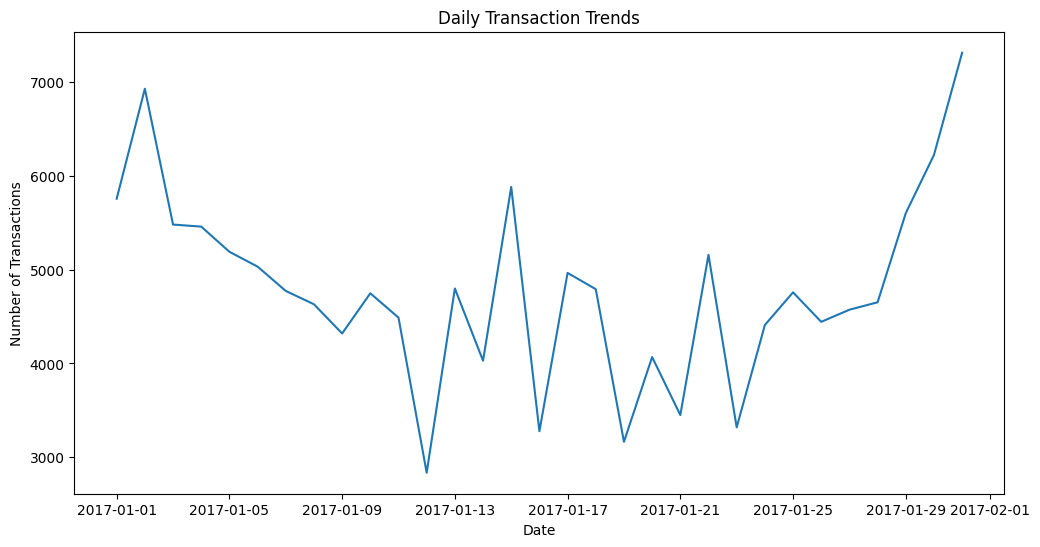

In [5]:
from matplotlib import pyplot as plt
df["TGL_TRANS"] = pd.to_datetime(df["TGL_TRANS"], format = "%d-%m-%Y")
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS']).dt.date

daily_transactions = df.groupby('TGL_TRANS')['NO_BKT'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['TGL_TRANS'], daily_transactions['NO_BKT'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Trends')
plt.show()

###
Grafik di atas menunjukkan **tren jumlah transaksi harian** di sebuah supermarket selama periode **Januari 2017**.

### Penjelasan Grafik
1. **Sumbu X (horizontal)**: Menunjukkan tanggal selama bulan Januari 2017.
2. **Sumbu Y (vertikal)**: Menunjukkan jumlah transaksi per hari.

### Analisis
1. **Awal Bulan**:
   - Pada awal Januari, jumlah transaksi cukup tinggi, melebihi **7.000 transaksi per hari**, kemungkinan terkait dengan momentum belanja awal tahun.

2. **Penurunan Bertahap**:
   - Setelah tanggal 2 Januari, jumlah transaksi cenderung menurun hingga mendekati **3.000 transaksi per hari** di pertengahan bulan.

3. **Variasi di Tengah Bulan**:
   - Pada pertengahan bulan, terjadi fluktuasi signifikan dengan beberapa hari mencatat lonjakan transaksi hingga sekitar **6.000 transaksi**, diikuti penurunan tajam.

4. **Akhir Bulan**:
   - Menjelang akhir Januari, jumlah transaksi meningkat kembali secara konsisten, mencapai puncaknya mendekati **7.500 transaksi per hari**.

### Kesimpulan
- Tren transaksi menunjukkan pola musiman, dengan lonjakan di awal dan akhir bulan.
- Penurunan di pertengahan bulan bisa disebabkan oleh menurunnya daya beli atau siklus belanja pelanggan.
- Lonjakan di akhir bulan mungkin dipicu oleh promosi atau periode gajian, yang meningkatkan daya beli masyarakat.

---

In [13]:
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'], errors='coerce')

df['Days'] = df['TGL_TRANS'].dt.day_name()
daily_transactions_count = df.groupby('Days').size().reset_index(name='Transaction_Count')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transactions_count['Days'] = pd.Categorical(daily_transactions_count['Days'], categories=day_order, ordered=True)

daily_transactions_count = daily_transactions_count.sort_values('Days')

print(daily_transactions_count)

        Days  Transaction_Count
1     Monday              24061
5    Tuesday              26908
6  Wednesday              19493
4   Thursday              15633
0     Friday              18469
2   Saturday              16902
3     Sunday              27020


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13460\3615798663.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Days', y='Transaction_Count', data=daily_transactions_count, marker='o', palette='viridis')


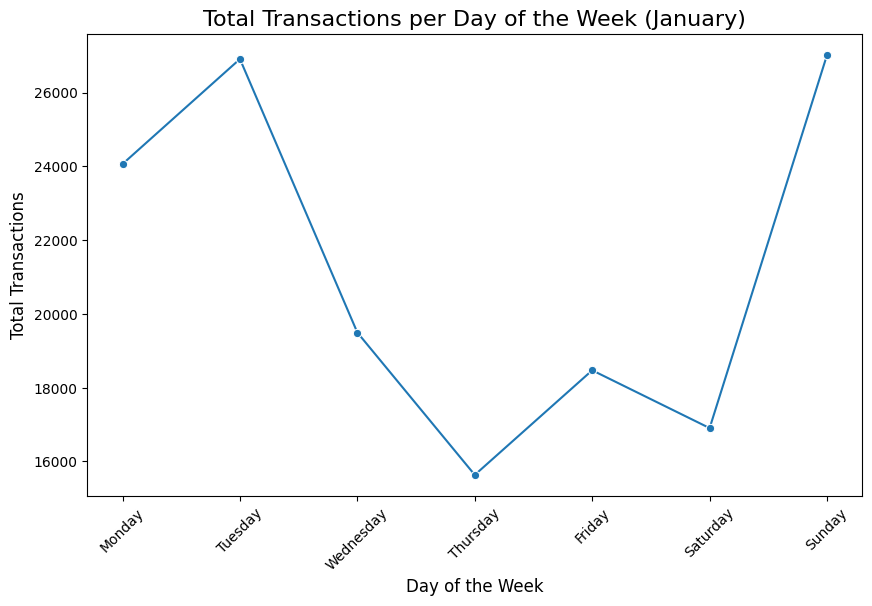

In [7]:
import seaborn as sns

# Plotting with Seaborn (Line Chart)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Days', y='Transaction_Count', data=daily_transactions_count, marker='o', palette='viridis')

# Add labels and title
plt.title('Total Transactions per Day of the Week (January)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.xticks(rotation=45)  # Rotate day labels for better readability

# Show the plot
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13460\1042812712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transaction_Count', y='KEL', data=top_items, palette='viridis')


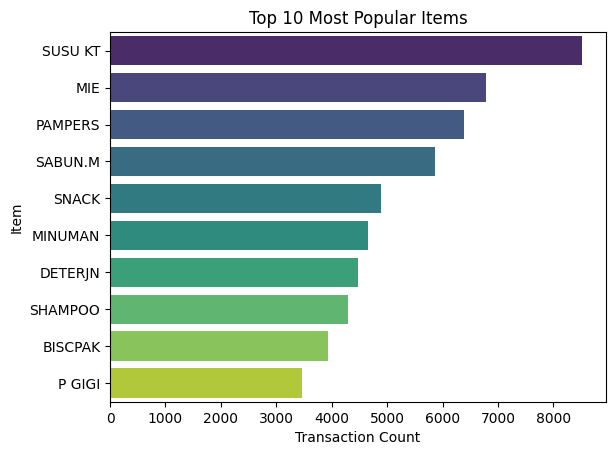

In [16]:
item_popularity = df['KEL'].value_counts().reset_index()
item_popularity.columns = ['KEL', 'Transaction_Count']
top_items = item_popularity.head(10)

sns.barplot(x='Transaction_Count', y='KEL', data=top_items, palette='viridis')
plt.title('Top 10 Most Popular Items')
plt.xlabel('Transaction Count')
plt.ylabel('Item')
plt.show()

### APRIORI

In [17]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Step 4: Create Basket for Apriori
basket = df.groupby(['NO_BKT', 'KEL']).size().unstack(fill_value=0)
basket = (basket > 0).astype(int)


In [18]:
bfrequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
print(frequent_itemsets)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                    itemsets
0   0.037991                     (AIR.M)
1   0.032251                   (ASESORS)
2   0.033590                   (B DAPUR)
3   0.063600                   (BISCPAK)
4   0.024106                   (BTL/DOT)
5   0.032360                    (COKLAT)
6   0.026593                   (DDORANT)
7   0.083607                   (DETERJN)
8   0.028507                      (GULA)
9   0.021373                       (HBL)
10  0.022849                   (INSECTA)
11  0.020389                     (KAPAS)
12  0.044823                      (KOPI)
13  0.029873                   (KOSMETC)
14  0.031841                   (M.GOSOK)
15  0.020061                    (MAINAN)
16  0.022767                   (MCEREAL)
17  0.078878                       (MIE)
18  0.091888                   (MINUMAN)
19  0.042418                    (MINYAK)
20  0.026675                      (OBAT)
21  0.029272                   (OBATPEL)
22  0.076227                    (P GIGI)
23  0.139718    

## Penjelasan Data
Data di atas menunjukkan tingkat *support* untuk masing-masing kategori produk dalam transaksi tertentu. Nilai *support* mengindikasikan seberapa sering suatu produk muncul dalam data transaksi relatif terhadap total transaksi.

### Insight Utama
1. **Produk dengan *Support* Tinggi:**
   - **PAMPERS (0.139718):** Produk ini memiliki tingkat *support* tertinggi, artinya paling sering muncul dalam transaksi. Ini menunjukkan bahwa PAMPERS adalah produk yang sangat populer.
   - **MINUMAN (0.091888):** Juga merupakan kategori dengan permintaan tinggi.
   - **DETERJN (0.083607):** Menempati posisi berikutnya, mencerminkan kebutuhan rumah tangga yang signifikan.
   
2. **Produk dengan *Support* Rendah:**
   - **MAINAN (0.020061), KAPAS (0.020389), HBL (0.021373):** Produk ini jarang muncul dalam data transaksi, menunjukkan permintaan rendah.

3. **Produk Populer Lainnya:**
   - **MIE (0.078878), P GIGI (0.076227), SNACK (0.068984):** Termasuk dalam kategori produk dengan permintaan sedang hingga tinggi.

---

## Rekomendasi
1. **Prioritaskan Stok untuk Produk dengan *Support* Tinggi:**
   - Fokus pada produk seperti **PAMPERS, MINUMAN, dan DETERJN** karena memiliki permintaan tinggi. Pastikan stoknya cukup untuk menghindari kekurangan.

2. **Tingkatkan Promosi pada Produk dengan *Support* Sedang:**
   - Promosikan produk seperti **MIE, P GIGI, dan SHAMPOO** untuk mendorong lebih banyak pembelian.

3. **Strategi untuk Produk dengan *Support* Rendah:**
   - Evaluasi ulang kategori seperti **MAINAN, KAPAS, dan HBL**. Anda dapat mempertimbangkan untuk:
     - Mengurangi stok jika margin keuntungan rendah.
     - Menawarkan diskon/promosi untuk meningkatkan penjualan.

4. **Diversifikasi Penjualan dengan Paket Bundling:**
   - Kombinasikan produk dengan *support* tinggi (misalnya, MINUMAN) dengan produk *support* rendah (misalnya, HBL) dalam satu paket untuk menarik minat pembeli.

Strategi ini dapat membantu dalam pengelolaan stok, peningkatan penjualan, dan pengurangan produk dengan perputaran rendah.


           antecedents         consequents   support  confidence      lift
0              (SNACK)           (BISCPAK)  0.021974    0.318542  5.008515
1            (BISCPAK)             (SNACK)  0.021974    0.345509  5.008515
2            (DETERJN)               (MIE)  0.023259    0.278195  3.526894
3                (MIE)           (DETERJN)  0.023259    0.294872  3.526894
4            (DETERJN)           (SOFTENR)  0.027605    0.330173  7.699413
5            (SOFTENR)           (DETERJN)  0.027605    0.643722  7.699413
6            (SUSU KT)           (DETERJN)  0.023997    0.144123  1.723828
7            (DETERJN)           (SUSU KT)  0.023997    0.287022  1.723828
8            (PAMPERS)            (P GIGI)  0.020608    0.147496  1.934954
9             (P GIGI)           (PAMPERS)  0.020608    0.270348  1.934954
10           (SABUN.M)            (P GIGI)  0.040860    0.466313  6.117413
11            (P GIGI)           (SABUN.M)  0.040860    0.536034  6.117413
12           (SHAMPOO)   

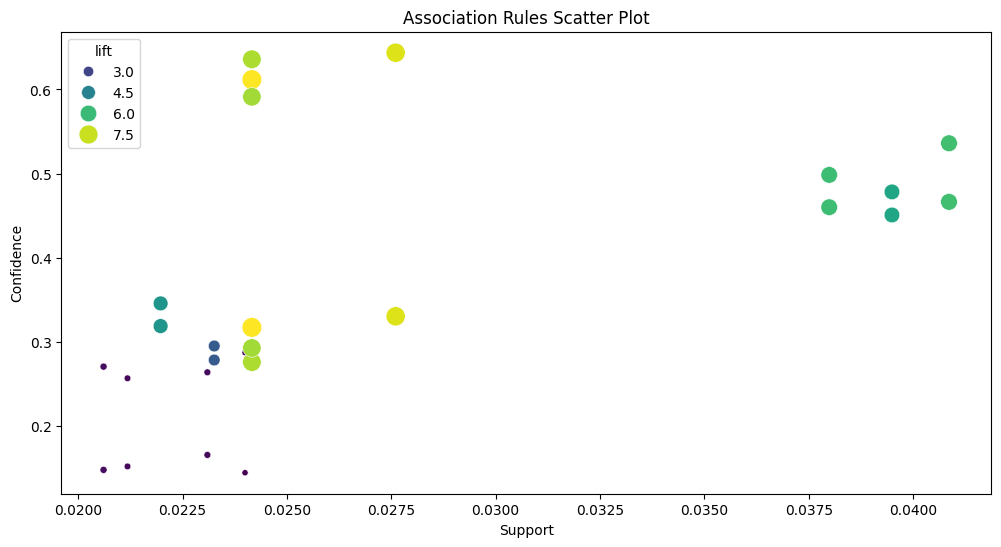

In [19]:

# Step 6: Generate and Visualize Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis', sizes=(20, 200))
plt.title('Association Rules Scatter Plot')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


## Penjelasan Temuan

### 1. **Definisi Metode**:
- **Antecedents**: Barang yang memicu pembelian barang lainnya (consequents).
- **Consequents**: Barang yang sering dibeli bersamaan dengan antecedents.
- **Support**: Proporsi transaksi yang melibatkan kombinasi barang.
- **Confidence**: Probabilitas terjualnya consequents jika antecedents dibeli.
- **Lift**: Ukuran kekuatan hubungan antar barang dibandingkan dengan kebetulan acak. Lift > 1 menunjukkan korelasi positif.

### 2. **Pola Penting**:
- **Pola Kombinasi Produk Umum**:
  - **SNACK** dengan **BISCPAK** memiliki lift 5.01, artinya pelanggan yang membeli salah satu dari keduanya memiliki kemungkinan 5 kali lebih tinggi untuk membeli produk lainnya.
  - **DETERJN** dan **SOFTENR** memiliki lift 7.7, menunjukkan hubungan kuat antar produk kebersihan rumah tangga.
- **Triple Itemsets**:
  - Kombinasi **SABUN.M**, **SHAMPOO**, dan **P GIGI** memiliki lift 8.02, menunjukkan hubungan kuat antar barang kebutuhan mandi.

### 3. **Hubungan Menarik**:
- Produk seperti **SABUN.M**, **SHAMPOO**, dan **P GIGI** memiliki banyak korelasi kuat dengan lift > 5, mengindikasikan pelanggan yang membeli satu produk cenderung membeli produk terkait lainnya.

---

## Rekomendasi untuk Manager

### 1. **Strategi Penempatan Barang**:
- Tempatkan barang yang sering dibeli bersama, seperti **DETERJN** dan **SOFTENR**, di lokasi berdekatan untuk meningkatkan peluang pembelian impulsif.
- Produk dengan hubungan triple itemsets, seperti **SABUN.M**, **SHAMPOO**, dan **P GIGI**, dapat ditempatkan dalam satu rak atau diatur dalam promosi paket.

### 2. **Promosi Bundle**:
- Buat promosi bundling untuk barang-barang dengan lift tinggi. Contoh:
  - Paket kebersihan rumah tangga: **DETERJN** dan **SOFTENR**.
  - Paket mandi keluarga: **SABUN.M**, **SHAMPOO**, dan **P GIGI**.
- Diskon untuk pembelian kombinasi **SNACK** dan **BISCPAK**.

### 3. **Pengaturan Diskon Musiman**:
- Saat pelanggan sering membeli barang terkait (misalnya produk mandi), tawarkan diskon musiman untuk semua produk terkait.

### 4. **Analisis Lanjutan**:
- Lakukan analisis lebih mendalam pada pola transaksi musiman untuk menyesuaikan strategi stok dan promosi.
- Amati pola transaksi untuk waktu atau hari tertentu (misalnya weekend vs weekday).

### 5. **Pengalaman Pelanggan**:
- Tawarkan rekomendasi produk di kasir atau aplikasi online berdasarkan riwayat pembelian sebelumnya, misalnya pelanggan yang membeli **DETERJN** dapat direkomendasikan **SOFTENR**.

---

Langkah ini dapat membantu meningkatkan penjualan melalui cross-selling dan upselling serta meningkatkan kepuasan pelanggan.
